In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)


2.2.0
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.3.4
numpy 1.19.5
pandas 1.1.5
sklearn 0.24.2
tensorflow 2.2.0
tensorflow.keras 2.3.0-tf


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [3]:
# x = (x - u) / std

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# x_train: [None, 28, 28] -> [None, 784]
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)


In [4]:
# tf.keras.models.Sequential()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="selu"))#把之前的relu改为了selu
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(0.001),
              metrics = ["accuracy"])

In [5]:
help(keras.layers.Dense)

Help on class Dense in module tensorflow.python.keras.layers.core:

class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 1 of the `kernel` (using `tf.tensordot`).
 |  For example, if input has dimensions `(batch_size, d0, d1)`,
 |  then we create a `kernel` with shape `(d1, units)`, and the `kernel` operates
 |  along axis 2 of the `input`, on every sub-tensor of shape `(1, 1, d1)`
 |  (ther

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

In [7]:
len(model.layers)

22

In [8]:
# Tensorboard, earlystopping, ModelCheckpoint
logdir = './dnn-selu-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,
                                 "fashion_mnist_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,
                                    save_best_only = True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3),
]
history = model.fit(x_train_scaled, y_train, epochs=100,
                    validation_data=(x_valid_scaled, y_valid),
                    callbacks = callbacks)

Epoch 1/100
1719/1719 [==============================] - 14s 8ms/step - loss: 0.6804 - accuracy: 0.7608 - val_loss: 0.5308 - val_accuracy: 0.8086
Epoch 2/100
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4853 - accuracy: 0.8247 - val_loss: 0.4647 - val_accuracy: 0.8356
Epoch 3/100
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4358 - accuracy: 0.8405 - val_loss: 0.4287 - val_accuracy: 0.8482
Epoch 4/100
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4046 - accuracy: 0.8536 - val_loss: 0.4047 - val_accuracy: 0.8550
Epoch 5/100
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3827 - accuracy: 0.8604 - val_loss: 0.3916 - val_accuracy: 0.8590
Epoch 6/100
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3644 - accuracy: 0.8667 - val_loss: 0.3791 - val_accuracy: 0.8650
Epoch 7/100
1719/1719 [==============================] - 15s 8ms/step - loss: 0.3491 - accuracy: 0.8722 - val_loss: 0.3783 -

In [9]:
print(history.history)

{'loss': [0.6804234385490417, 0.4852588176727295, 0.4357646703720093, 0.40455174446105957, 0.3827029764652252, 0.36444544792175293, 0.34905922412872314, 0.3376479148864746, 0.3256559371948242, 0.31584829092025757, 0.3070375919342041, 0.29819342494010925, 0.2900788187980652, 0.28172820806503296, 0.2763221859931946, 0.2690071165561676, 0.2643806040287018, 0.2576029896736145, 0.2516016662120819, 0.24593989551067352, 0.24032410979270935], 'accuracy': [0.7608363628387451, 0.8246545195579529, 0.8405454754829407, 0.8536363840103149, 0.8604182004928589, 0.8666909337043762, 0.8722363710403442, 0.8769272565841675, 0.8808727264404297, 0.8841272592544556, 0.8869636654853821, 0.8905090689659119, 0.8931454420089722, 0.8971090912818909, 0.8980727195739746, 0.9014182090759277, 0.9025454521179199, 0.9052000045776367, 0.9072363376617432, 0.9098363518714905, 0.9107818007469177], 'val_loss': [0.5307890772819519, 0.46470585465431213, 0.4287204444408417, 0.40469515323638916, 0.3916364908218384, 0.3791105449

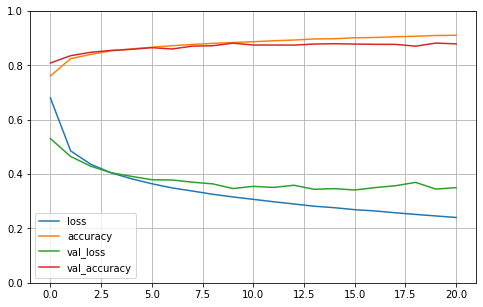

In [10]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

# 1. 参数众多，训练不充分
# 2. 梯度消失 -> 链式法则 -> 复合函数f(g(x))
#    selu缓解梯度消失

In [11]:
model.evaluate(x_test_scaled, y_test, verbose=0)

[0.38892924785614014, 0.8654000163078308]